In [1]:
from __future__ import absolute_import, division, print_function
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfprob
import seaborn as sns
sns.set(color_codes=True)

import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
tf.enable_eager_execution()

In [2]:
def print_subclasses_from_module(module, base_class, maxwidth=80):
  import functools, inspect, sys
  subclasses = [name for name, obj in inspect.getmembers(module)
                if inspect.isclass(obj) and issubclass(obj, base_class)]
  def red(acc, x):
    if not acc or len(acc[-1]) + len(x) + 2 > maxwidth:
      acc.append(x)
    else:
      acc[-1] += ", " + x
    return acc
  print('\n'.join(functools.reduce(red, subclasses, [])))

In [3]:
dist = tfprob.distributions.Normal(name='normal',loc=0,scale=1)

In [4]:
x = tf.lin_space(0.0,1.0,1000,)
y =dist.sample(10000)

In [5]:
print(dist.log_prob(.1))

tf.Tensor(-0.9239385, shape=(), dtype=float32)


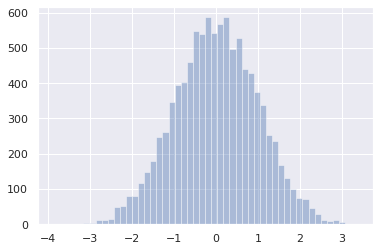

In [6]:
y =dist.sample(10000)
sns.distplot(y,kde=False)

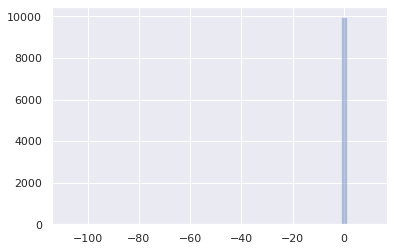

In [7]:

studentt = tfprob.distributions.StudentT(df=1,loc=0,scale=.01,)
y =studentt.sample(10000)
sns.distplot(y,kde=False)

In [8]:
print_subclasses_from_module(tfprob.distributions,tfprob.distributions.Distribution)

Autoregressive, BatchReshape, Bernoulli, Beta, Binomial, Blockwise, Categorical
Cauchy, Chi, Chi2, Chi2WithAbsDf, ConditionalDistribution
ConditionalTransformedDistribution, Deterministic, Dirichlet
DirichletMultinomial, Distribution, Empirical, ExpRelaxedOneHotCategorical
Exponential, FiniteDiscrete, Gamma, GammaGamma, GaussianProcess
GaussianProcessRegressionModel, Geometric, Gumbel, HalfCauchy, HalfNormal
HiddenMarkovModel, Horseshoe, Independent, InverseGamma, InverseGaussian
JointDistribution, JointDistributionCoroutine, JointDistributionNamed
JointDistributionSequential, Kumaraswamy, LKJ, Laplace
LinearGaussianStateSpaceModel, LogNormal, Logistic, Mixture, MixtureSameFamily
Multinomial, MultivariateNormalDiag, MultivariateNormalDiagPlusLowRank
MultivariateNormalDiagWithSoftplusScale, MultivariateNormalFullCovariance
MultivariateNormalLinearOperator, MultivariateNormalTriL
MultivariateStudentTLinearOperator, NegativeBinomial, Normal, OneHotCategorical
Pareto, Poisson, PoissonLogNo

In [9]:
d = tfprob.distributions.Normal([0,2,4],1)

In [10]:
data = d.sample(1000)

In [11]:
d.log_prob([.1,.1,.1])

<tf.Tensor: id=146, shape=(3,), dtype=float32, numpy=array([-0.9239385, -2.7239385, -8.523939 ], dtype=float32)>

In [12]:
xs = np.linspace(0,1,200)

In [13]:
try:
    xsn = d.log_prob(xs)
except Exception as e:
    print(e)

Incompatible shapes: [200] vs. [3] [Op:Sub] name: Normal/log_prob/standardize/sub/


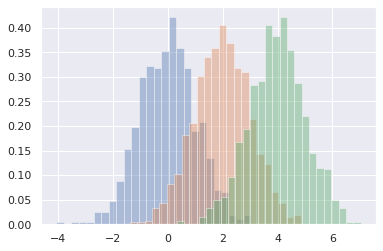

In [14]:
for k in range(3):
    sns.distplot(data[:,k],norm_hist=True,kde=False)

In [33]:
mvn = tfprob.distributions.MultivariateNormalDiag([0,5],[.02,3])

In [34]:
samples = mvn.sample(1000)

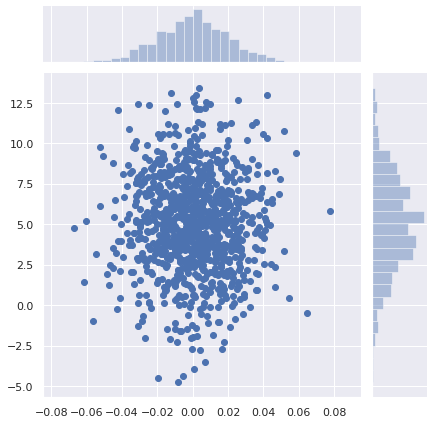

In [35]:
sns.jointplot(samples[:,0], samples[:,1],kind='scatter')

In [18]:
lkj = tfprob.distributions.LKJ(dimension=10,concentration=[1.5,3])

In [19]:
samples = lkj.sample()

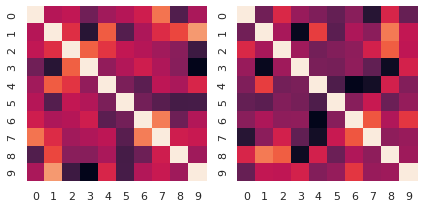

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
sns.heatmap(samples[0,...],ax=axes[0],cbar=False)
sns.heatmap(samples[1,...],ax=axes[1],cbar=False)
plt.tight_layout()
plt.show()

In [21]:
[module for module in dir(tfprob.positive_semidefinite_kernels) if not module.startswith("__")]

['ExpSinSquared',
 'ExponentiatedQuadratic',
 'FeatureScaled',
 'FeatureTransformed',
 'KumaraswamyTransformed',
 'Linear',
 'MaternFiveHalves',
 'MaternOneHalf',
 'MaternThreeHalves',
 'Polynomial',
 'PositiveSemidefiniteKernel',
 'RationalQuadratic',
 'SchurComplement',
 '_allowed_symbols']

In [22]:

kernel  = tfprob.positive_semidefinite_kernels.ExponentiatedQuadratic()

In [23]:
xs = np.linspace(-5.0,5.0,200).reshape([-1,1])
gp = tfprob.distributions.GaussianProcess(kernel=kernel,index_points=xs)

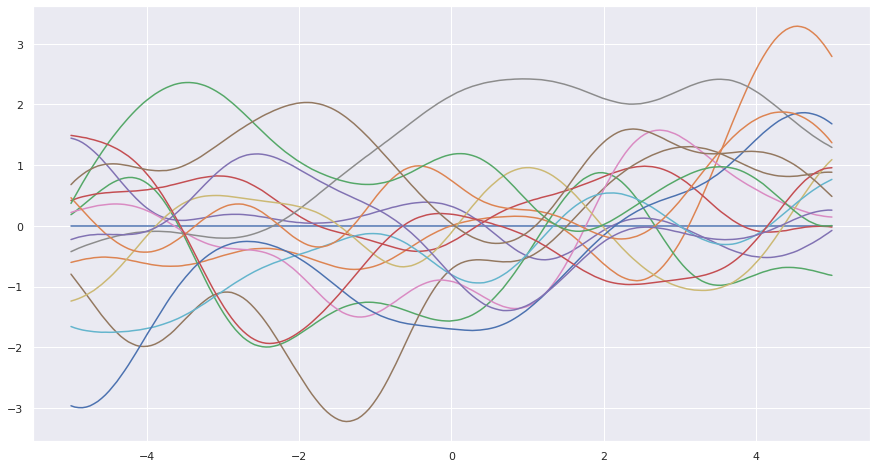

In [24]:
plt.figure(figsize=(15,8))
plt.plot(xs,gp.mean())
for k in range(15):
    plt.plot(xs,gp.sample())

In [25]:
obs_x = [[-4],[4],[1],[2],[-1]]
obs_y = [-1,2,1,3,0]

In [26]:
gprm  = tfprob.distributions.GaussianProcessRegressionModel(kernel,xs,obs_x,obs_y)

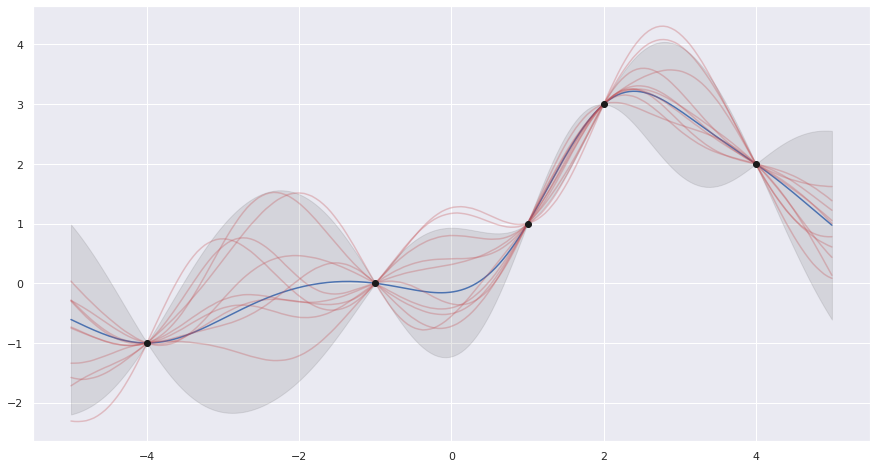

In [27]:
plt.figure(figsize=(15,8))

upper, lower = gprm.mean() + [2 * gprm.stddev(), -2 * gprm.stddev()]
plt.plot(xs, gprm.mean())
plt.fill_between(xs[..., 0], upper, lower, color='k', alpha=.1)
#plt.fill_between(xs[..., 0], upper, lower, color='k', alpha=.1)
for _ in range(10):
  plt.plot(xs, gprm.sample(), c='r', alpha=.3)
plt.scatter(obs_x, obs_y, c='k', zorder=3)
plt.show()

In [28]:
print_subclasses_from_module(tfprob.bijectors, tfprob.bijectors.Bijector)


AbsoluteValue, Affine, AffineLinearOperator, AffineScalar, BatchNormalization
Bijector, Blockwise, Chain, CholeskyOuterProduct, CholeskyToInvCholesky
ConditionalBijector, CorrelationCholesky, Cumsum, DiscreteCosineTransform, Exp
Expm1, FillTriangular, Gumbel, Identity, Inline, Invert, IteratedSigmoidCentered
Kumaraswamy, MaskedAutoregressiveFlow, MatrixInverseTriL, MatvecLU, NormalCDF
Ordered, Permute, PowerTransform, RealNVP, Reciprocal, Reshape, ScaleTriL
Sigmoid, SinhArcsinh, SoftmaxCentered, Softplus, Softsign, Square, Tanh
TransformDiagonal, Transpose, Weibull


In [29]:
print_subclasses_from_module(tfprob.positive_semidefinite_kernels,tfprob.positive_semidefinite_kernels.PositiveSemidefiniteKernel)

ExpSinSquared, ExponentiatedQuadratic, FeatureScaled, FeatureTransformed
KumaraswamyTransformed, Linear, MaternFiveHalves, MaternOneHalf
MaternThreeHalves, Polynomial, PositiveSemidefiniteKernel, RationalQuadratic
SchurComplement


### TFP Stats Function 

In [36]:
tfprob.stats.auto_correlation(np.random.randn(100))

<tf.Tensor: id=15546, shape=(100,), dtype=float64, numpy=
array([ 1.00000000e+00, -2.28229318e-02, -3.38921474e-02, -7.31663695e-03,
       -1.75375096e-01,  4.95084884e-02, -3.10160042e-03, -8.06904740e-03,
       -8.07834198e-03, -1.01789029e-01, -9.09071225e-03, -7.30114920e-02,
        4.96613400e-02, -6.64895638e-02,  1.30239401e-01, -3.62744161e-02,
       -1.04710374e-01, -1.59640021e-03, -4.34158830e-02,  9.81832667e-02,
       -3.32744586e-02,  1.31614533e-02,  1.49512672e-02, -4.67609052e-03,
        1.10073057e-01,  1.34899665e-02,  3.08987038e-02, -8.36631115e-03,
       -2.06846555e-02,  2.93889417e-01, -1.22376248e-01, -1.63052630e-01,
       -2.39709578e-01, -4.63967268e-02,  4.46871422e-02, -1.33897820e-01,
       -1.66798927e-02,  1.06323937e-01, -1.74169162e-01,  1.71231531e-01,
        3.91338001e-05, -5.26405394e-02,  9.29659947e-02, -2.62513799e-02,
       -1.81468814e-01,  3.71573768e-02, -1.15515458e-01,  2.93386950e-01,
        2.65379939e-01,  7.33463590e-02, -

In [ ]:
ts = 